In [114]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sc
from mpl_toolkits import mplot3d
#%matplotlib widget

In [115]:
alpha = -0.15e4
beta = 0.75e12
rho = 1e-6

phi = np.linspace(-5*10**-5,5*10**-5,10**5)
IL = 0
U = alpha*phi**2 + beta*phi**4 - phi*IL
dU_dphi = 2*alpha*phi + 4*beta*phi**3 - IL
print(phi)

[-5.0000e-05 -4.9999e-05 -4.9998e-05 ...  4.9998e-05  4.9999e-05
  5.0000e-05]


In [116]:

def sol(p):
    return(2*alpha*p+4*beta*p**3-IL)
phi_0 = sc.optimize.fsolve(sol,0.1)
phi_1 = sc.optimize.fsolve(sol,-0.1)
phi_2 = sc.optimize.fsolve(sol,10**-5)

In [117]:
der_0 = []
th = 10**-9
for i in range(len(phi)):
    if abs(phi[i] - phi_0) <th:
        der_0.append(phi[i])
    if abs(phi[i] - phi_1) <th:
        der_0.append(phi[i])
    if abs(phi[i] - phi_2) <th:
        der_0.append(phi[i])
    
        

print(der_0)
U_0 = []
dU_dphi_0 = []
for i in range(len(der_0)):
    U_0.append(alpha*der_0[i]**2 + beta*der_0[i]**4 - der_0[i]*IL)
    dU_dphi_0.append(2*alpha*der_0[i] + 4*beta*der_0[i]**3 - IL)

[-3.162281622816228e-05, -3.162181621816218e-05, -5.000050000433603e-10, 5.000050000501365e-10, 3.1621816218162185e-05, 3.1622816228162285e-05]


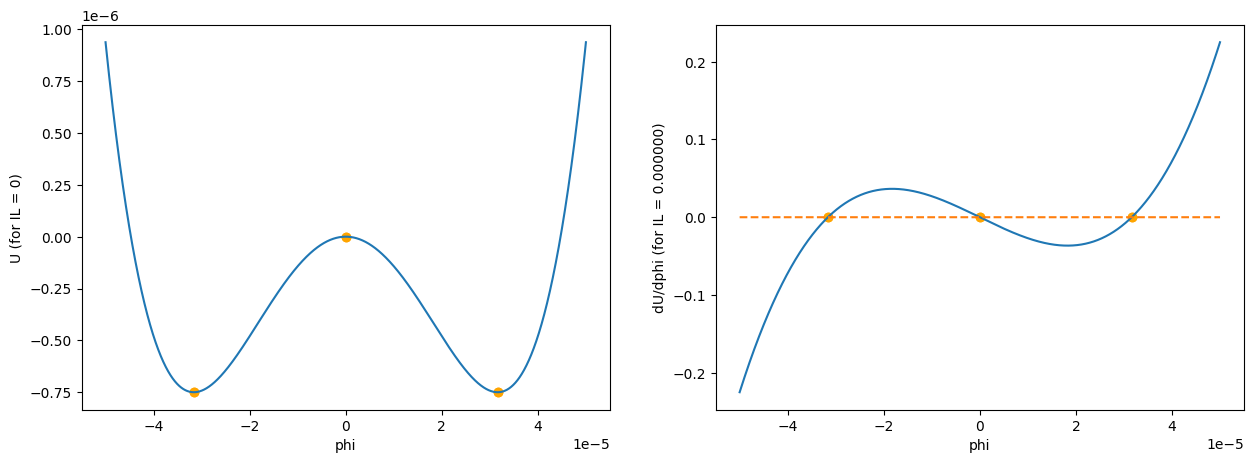

In [118]:
plt.rcParams["figure.figsize"] = (15, 5)
plt.subplot(121)
plt.plot(phi,U)
plt.scatter(der_0,U_0,c = 'orange')
plt.xlabel("phi")
plt.ylabel("U (for IL = 0)")
plt.subplot(122)
plt.plot(phi,dU_dphi)
plt.plot(phi,[0 for i in range(len(phi))], '--')
plt.scatter(der_0,dU_dphi_0,c = 'orange')
plt.xlabel("phi")
plt.ylabel("dU/dphi (for IL = %f)"%IL)
plt.show()

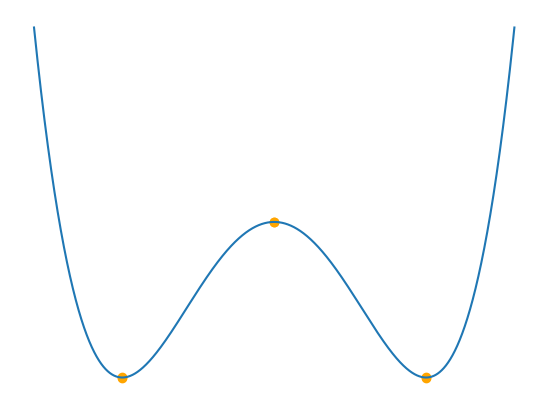

In [119]:
plt.rcParams["figure.figsize"] = (15, 5)
plt.subplot(121)
plt.plot(phi,U)
plt.scatter(der_0,U_0,c = 'orange')
plt.xlabel("phi")
plt.ylabel("U (for IL = 0)")
plt.axis("off")
#plt.title("U (for IL = 0)")
plt.show()

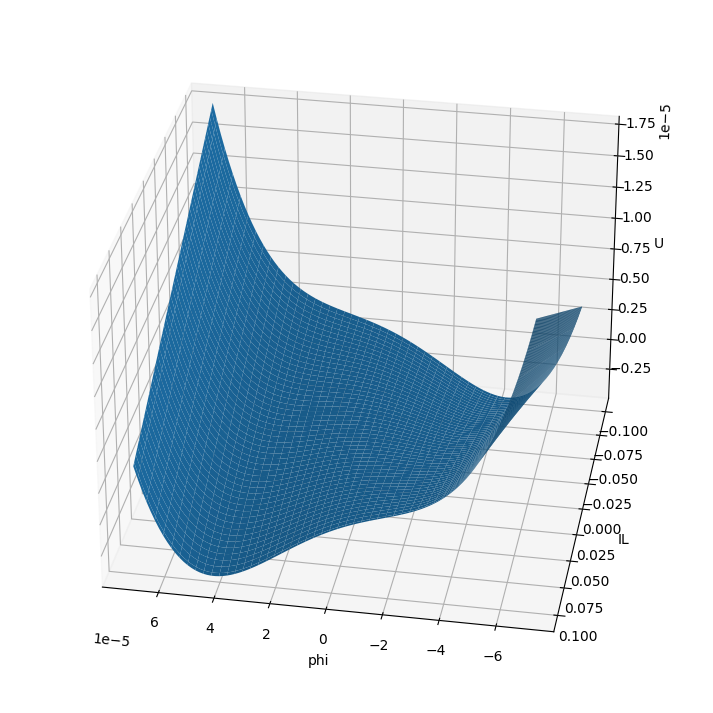

In [120]:
fig = plt.figure(figsize =(14, 9))
alpha = -0.15e4
beta = 0.75e12
n = 10**2
phi = np.linspace(-7*10**-5,7*10**-5,n)
IL = np.linspace(-10**-1 ,10**-1,n)
phi, IL = np.meshgrid(phi,IL)
U = alpha*phi**2 + beta*phi**4 - phi*IL
ax = plt.axes(projection = '3d')
ax.plot_surface(phi,IL,U)
ax.set_xlabel("phi")
ax.set_ylabel("IL")
ax.set_zlabel("U")
ax.view_init(30, 100)
plt.show()